In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,92800,0,0,RightFlow,203,4,1,21.8,"December 29, 2016",I like this game so much that I ended up buyin...
1,92800,0,0,76561197982049492,46,1,1,14.9,"December 29, 2016",After the first few levels the difficulty curv...
2,92800,0,0,rodrigosetti,84,1,1,10.5,"December 27, 2016",great puzzle. 6 hours in and still having lots...
3,92800,0,0,zarankiewicz,131,1,1,16.6,"December 27, 2016",Interesting puzzles in rapidly increasing diff...
4,92800,0,0,InfiniteAces777,228,3,1,7.6,"December 25, 2016",Fun


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,21.8,"December 29, 2016",I like this game so much that I ended up buyin...
1,0,0,1,14.9,"December 29, 2016",After the first few levels the difficulty curv...
2,0,0,1,10.5,"December 27, 2016",great puzzle. 6 hours in and still having lots...
3,0,0,1,16.6,"December 27, 2016",Interesting puzzles in rapidly increasing diff...
4,0,0,1,7.6,"December 25, 2016",Fun


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"December 29, 2016",I like this game so much that I ended up buyin...,0,0,21.8,1
1,"December 29, 2016",After the first few levels the difficulty curv...,0,0,14.9,1
2,"December 27, 2016",great puzzle. 6 hours in and still having lots...,0,0,10.5,1
3,"December 27, 2016",Interesting puzzles in rapidly increasing diff...,0,0,16.6,1
4,"December 25, 2016",Fun,0,0,7.6,1
5,"December 22, 2016",lots of fun but gets difficult pretty quickly.,0,0,8.9,1
6,"December 13, 2016",Y|E-SG| OF-O|R I-T,0,0,76.6,1
7,"December 9, 2016",Think you are smart? do you like logical puzzl...,0,0,9.8,1
8,"December 8, 2016",I love cerbral games like this. If you find ce...,2,1,4.3,-1
9,"December 8, 2016",The tags list this game as casual.Those tags a...,1,0,3.8,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  1440 non-null   object 
 1   Review_Text     1437 non-null   object 
 2   Num_Helpful     1440 non-null   int64  
 3   Num_Funny       1440 non-null   int64  
 4   Hours_Played    1440 non-null   float64
 5   Recommend       1440 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 67.6+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18824/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"December 29, 2016",I like this game so much that I ended up buyin...,0,0,21.8,1,1482969600
1,"December 29, 2016",After the first few levels the difficulty curv...,0,0,14.9,1,1482969600
2,"December 27, 2016",great puzzle. 6 hours in and still having lots...,0,0,10.5,1,1482796800
3,"December 27, 2016",Interesting puzzles in rapidly increasing diff...,0,0,16.6,1,1482796800
4,"December 25, 2016",Fun,0,0,7.6,1,1482624000


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18824/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 29, 2016",I like this game so much that I ended up buyin...,0,0,21.8,1,1482969600,2452
1,"December 29, 2016",After the first few levels the difficulty curv...,0,0,14.9,1,1482969600,2452
2,"December 27, 2016",great puzzle. 6 hours in and still having lots...,0,0,10.5,1,1482796800,2451
3,"December 27, 2016",Interesting puzzles in rapidly increasing diff...,0,0,16.6,1,1482796800,2451
4,"December 25, 2016",Fun,0,0,7.6,1,1482624000,2451


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 29, 2016",I like this game so much that I ended up buyin...,0,0,21.8,1,1482969600,2452
1,"December 29, 2016",After the first few levels the difficulty curv...,0,0,14.9,1,1482969600,2452
2,"December 27, 2016",great puzzle. 6 hours in and still having lots...,0,0,10.5,1,1482796800,2451
3,"December 27, 2016",Interesting puzzles in rapidly increasing diff...,0,0,16.6,1,1482796800,2451
4,"December 25, 2016",Fun,0,0,7.6,1,1482624000,2451


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2452,"December 29, 2016",I like this game so much that I ended up buyin...
1,2452,"December 29, 2016",After the first few levels the difficulty curv...
2,2451,"December 27, 2016",great puzzle. 6 hours in and still having lots...
3,2451,"December 27, 2016",Interesting puzzles in rapidly increasing diff...
4,2451,"December 25, 2016",Fun


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2165,"July 3, 2011",12
1,2165,"July 4, 2011",41
2,2165,"July 5, 2011",11
3,2165,"July 6, 2011",5
4,2166,"July 10, 2011",8
...,...,...,...
928,2697,"September 15, 2021",1
929,2700,"October 5, 2021",1
930,2701,"October 11, 2021",1
931,2702,"October 14, 2021",1


<AxesSubplot:>

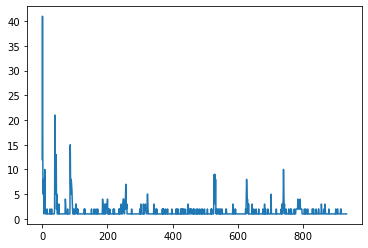

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

1440

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.5434083601286173

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2165,69
1,2166,27
2,2167,6
3,2168,3
4,2169,1
...,...,...
434,2697,2
435,2700,1
436,2701,1
437,2702,1


<AxesSubplot:>

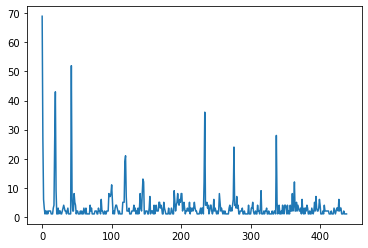

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

1440

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

3.2801822323462413

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 29, 2016",I like this game so much that I ended up buyin...,0,0,21.8,1,1482969600,2452
1,"December 29, 2016",After the first few levels the difficulty curv...,0,0,14.9,1,1482969600,2452
2,"December 27, 2016",great puzzle. 6 hours in and still having lots...,0,0,10.5,1,1482796800,2451
3,"December 27, 2016",Interesting puzzles in rapidly increasing diff...,0,0,16.6,1,1482796800,2451
4,"December 25, 2016",Fun,0,0,7.6,1,1482624000,2451


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2165,3
1,2166,1
2,2167,0
3,2168,4
4,2169,8
...,...,...
434,2697,0
435,2700,0
436,2701,0
437,2702,3


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2165,1,0,0.0,0.043478
2166,1,0,0.0,0.037037
2167,0,0,0.0,0.000000
2168,3,0,1.0,1.333333
2169,8,8,8.0,8.000000
...,...,...,...,...
2697,0,0,0.0,0.000000
2700,0,0,0.0,0.000000
2701,0,0,0.0,0.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

2448

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

1.7

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2165,0
1,2166,0
2,2167,0
3,2168,0
4,2169,1
...,...,...
434,2697,0
435,2700,0
436,2701,0
437,2702,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2165,0,0,0.0,0.0
2166,0,0,0.0,0.0
2167,0,0,0.0,0.0
2168,0,0,0.0,0.0
2169,1,1,1.0,1.0
...,...,...,...,...
2697,0,0,0.0,0.0
2700,0,0,0.0,0.0
2701,0,0,0.0,0.0


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

676

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.46944444444444444

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2165,4036.1
1,2166,1244.0
2,2167,1024.0
3,2168,65.6
4,2169,278.1
...,...,...
434,2697,89.0
435,2700,3.0
436,2701,161.9
437,2702,15.4


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2165,711.3,2.4,22.8,58.494203
2166,291.3,0.3,17.8,46.074074
2167,788.1,2.0,68.4,170.666667
2168,33.0,7.1,25.5,21.866667
2169,278.1,278.1,278.1,278.100000
...,...,...,...,...
2697,80.3,8.7,44.5,44.500000
2700,3.0,3.0,3.0,3.000000
2701,161.9,161.9,161.9,161.900000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

61361.9

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

42.61243055555555

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2165,1.0
1,2166,1.0
2,2167,1.0
3,2168,1.0
4,2169,1.0
...,...,...
434,2697,1.0
435,2700,1.0
436,2701,1.0
437,2702,1.0


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2165,1,1,1.0,1.0
2166,1,1,1.0,1.0
2167,1,1,1.0,1.0
2168,1,1,1.0,1.0
2169,1,1,1.0,1.0
...,...,...,...,...
2697,1,1,1.0,1.0
2700,1,1,1.0,1.0
2701,1,1,1.0,1.0


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

1302

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.9041666666666667

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 29, 2016",I like this game so much that I ended up buyin...,0,0,21.8,1,1482969600,2452
1,"December 29, 2016",After the first few levels the difficulty curv...,0,0,14.9,1,1482969600,2452
2,"December 27, 2016",great puzzle. 6 hours in and still having lots...,0,0,10.5,1,1482796800,2451
3,"December 27, 2016",Interesting puzzles in rapidly increasing diff...,0,0,16.6,1,1482796800,2451
4,"December 25, 2016",Fun,0,0,7.6,1,1482624000,2451


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 29, 2016",I like this game so much that I ended up buyin...,0,0,0.027538,1.0,0.531813,2452
1,"December 29, 2016",After the first few levels the difficulty curv...,0,0,0.018782,1.0,0.531813,2452
2,"December 27, 2016",great puzzle. 6 hours in and still having lots...,0,0,0.013198,1.0,0.531283,2451
3,"December 27, 2016",Interesting puzzles in rapidly increasing diff...,0,0,0.020939,1.0,0.531283,2451
4,"December 25, 2016",Fun,0,0,0.009518,1.0,0.530753,2451
...,...,...,...,...,...,...,...,...
1435,"March 7, 2020",Simple and deep idea of game is awesome!,0,0,0.098223,1.0,0.840403,2618
1436,"March 6, 2020",­,37,8,0.004569,1.0,0.840138,2618
1437,"March 1, 2020","This game is crazy hard, but it's really fun i...",0,0,0.038832,1.0,0.838812,2617
1438,"February 11, 2020",This game is the absolute GOAT mechanical puzz...,6,1,0.101777,1.0,0.833775,2614


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18824/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",A challenging puzzle game. Great for programme...,0,0,0.259264,1.0,1.000000,2704
1,"October 14, 2021",This is a very specific type of game. If you ...,3,0,0.019416,1.0,0.995758,2702
2,"October 11, 2021",My favourite game ever made.,0,0,0.205330,1.0,0.994963,2701
3,"October 5, 2021",very good game,0,0,0.003680,1.0,0.993372,2700
4,"September 15, 2021","Long ago, computers filled rooms and program i...",0,0,0.010914,1.0,0.988070,2697
5,"September 13, 2021",Good for your brain,0,0,0.101777,1.0,0.987540,2697
6,"September 5, 2021",Absolutely brilliant and fun game. If you;ve e...,0,0,0.010787,1.0,0.985419,2696
7,"August 26, 2021",Classic Zachtronics,0,0,0.141117,1.0,0.982768,2695
8,"August 17, 2021",A very challenging programming puzzle game abs...,0,0,0.055838,1.0,0.980382,2693
9,"August 11, 2021",epic,0,0,0.008629,1.0,0.978791,2692


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2165    [I played this game enough that it invaded my ...
2166    [A unique puzzler that allows for creativity. ...
2167    [This is the greatest puzzle game... of all ti...
2168    [A quite difficult but satisfying production l...
2169    [Easily the best Puzzle game I've ever played....
2170    [I think this game caters to a specific type o...
2173    [Now this is what I call a thinking man's game...
2174             [Omfg, SOOO FUNNN, best.puzzlegame.ever]
2175           [I am not smart enough to play this game.]
2178    [This is the hardest and most rewarding puzzle...
2179    [This game is EPIC. The challenge is to progra...
2180    [A little tricky to figure it out at first, bu...
2181    [All I can say it.... Awesome!, Great brain te...
2183    [Super fantastic puzzle game.  Especially good...
2185                               [Awesome puzzle game.]
2186    [The most challenging puzzle game I have ever ...
2187    [This game has the unparalleled ability to mak..

In [52]:
# storing data in JSON format
df_text_list.to_json('spacechem_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('spacechem_text.json')
print(game_text)

            name  index                                               data
0    Review_Text   2165  [I played this game enough that it invaded my ...
1    Review_Text   2166  [A unique puzzler that allows for creativity. ...
2    Review_Text   2167  [This is the greatest puzzle game... of all ti...
3    Review_Text   2168  [A quite difficult but satisfying production l...
4    Review_Text   2169  [Easily the best Puzzle game I've ever played....
5    Review_Text   2170  [I think this game caters to a specific type o...
6    Review_Text   2173  [Now this is what I call a thinking man's game...
7    Review_Text   2174           [Omfg, SOOO FUNNN, best.puzzlegame.ever]
8    Review_Text   2175         [I am not smart enough to play this game.]
9    Review_Text   2178  [This is the hardest and most rewarding puzzle...
10   Review_Text   2179  [This game is EPIC. The challenge is to progra...
11   Review_Text   2180  [A little tricky to figure it out at first, bu...
12   Review_Text   2181  

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('spacechem_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18824/2088620340.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('spacechem_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_18824/1895985529.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('spacechem_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])